In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [24]:
file_path = "/content/drive/MyDrive/STD/TeleCom_Data-1.xlsx"

# **Exploratory Data Analaysis**

In [21]:
try:
  df = pd.read_excel(file_path)
  print(f"File imported from '{file_path}'")
  display(df.head())
except FileNotFoundError:
  print(f"Error: File not found at '{file_path}'. Please check the path.")
except Exception as e:
  print(f"An error occured: {e}")


File imported from '/content/drive/MyDrive/STD/TeleCom_Data-1.xlsx'


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
#Initial inspection of Data
print("Dataset Shape:", df.shape)

Dataset Shape: (41180, 21)


In [26]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   age          job  marital            education  default housing loan  \
0   40       admin.  married             basic.6y       no      no   no   
1   56     services  married          high.school       no      no  yes   
2   45     services  married             basic.9y  unknown      no   no   
3   59       admin.  married  professional.course       no      no   no   
4   41  blue-collar  married              unknown  unknown      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  n

In [27]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   

In [28]:
print("\nSummary Statistics:")
pd.set_option('display.max_columns', None)
df.describe(include='all')


Summary Statistics:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41180.000000,41180,41180,41180,41180,41180,41180,41180,41180,41180,41180.000000,41180.000000,41180.000000,41180.000000,41180,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24921,12166,32581,21571,33943,26140,13765,8622,NaN,NaN,NaN,NaN,35559,NaN,NaN,NaN,NaN,NaN,36542
mean,40.021710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.280427,2.567800,962.516707,0.172705,NaN,0.081901,93.575508,-40.501999,3.621422,5167.053344,NaN
std,10.419593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.299856,2.770225,186.809028,0.493719,NaN,1.571037,0.578762,4.627358,1.734385,72.230334,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [29]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [30]:
print("Shape of the dataset before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape of the dataset after removing duplicates:", df.shape)

Shape of the dataset before removing duplicates: (41180, 21)
Shape of the dataset after removing duplicates: (41168, 21)


# **Data Handling**

In [31]:
# Data Cleaning ( According to the professor 999 in pdays can be considered as missing values. There are no -1 values in pdays so not adding code)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].replace('unknown', np.nan)
    df[col] = df[col].replace('nonexistent', np.nan)

# Handle special numerical values (999 in pdays)
print(f"\nUnique values in 'pdays': {sorted(df['pdays'].unique())}")


Unique values in 'pdays': [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(25), np.int64(26), np.int64(27), np.int64(999)]


In [32]:
if 999 in df['pdays'].values:
    print(f"Found {sum(df['pdays'] == 999)} records with pdays = 999 (missing values)")
    df['pdays'] = df['pdays'].replace(999, np.nan)  # Replace 999 with nan


Found 39655 records with pdays = 999 (missing values)


In [33]:
# Checking for other potential special values in numerical columns
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

print("\nChecking for special values in numerical columns:")
for col in numerical_cols:
    unique_vals = sorted(df[col].unique())
    print(f"{col}: {unique_vals[:10]}")


Checking for special values in numerical columns:
age: [np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26)]
duration: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
campaign: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
pdays: [np.float64(nan), np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0)]
previous: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
emp.var.rate: [np.float64(-3.4), np.float64(-3.0), np.float64(-2.9), np.float64(-1.8), np.float64(-1.7), np.float64(-1.1), np.float64(-0.2), np.float64(-0.1), np.float64(1.1), np.float64(1.4)]
cons.price.idx: [np.float64(92.201

In [34]:
# Check missing values after cleaning
print("\nMissing Values after cleaning:")
print(df.isnull().sum())


Missing Values after cleaning:
age                   0
job                 330
marital              80
education          1730
default            8595
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39655
previous              0
poutcome          35547
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64


# Data Quality Issues:

*   Critical missingness**: The `default` field (credit default status) is missing
for 86% of clients, severely limiting financial risk analysis
*   Expected missingness**: `pdays` and `poutcome` are missing for most clients (96% and 85% respectively), indicating they had no previous marketing contact
*  Moderate missingness**: Education (17%), housing/loan (9.9%), and job (3.3%) data has gaps that could introduce selection bias
*  Decided to keep the missing values as it is and not delete them. Anyways the
NaN values will be excluded from calculations and visualizations.





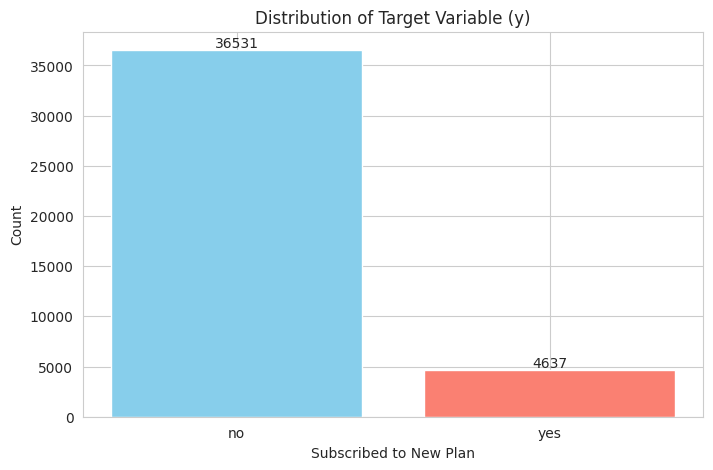

✓ Subscription Rate: 11.26%
✓ Total Clients: 41,168
✓ Subscribed: 4,637
✓ Not Subscribed: 36,531


In [35]:
# Univariate Analysis
plt.figure(figsize=(8, 5))
target_counts = df['y'].value_counts()
plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to New Plan')
plt.ylabel('Count')
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')
plt.show()

subscription_rate = (df['y'] == 'yes').mean() * 100
print(f"✓ Subscription Rate: {subscription_rate:.2f}%")
print(f"✓ Total Clients: {len(df):,}")
print(f"✓ Subscribed: {target_counts.get('yes', 0):,}")
print(f"✓ Not Subscribed: {target_counts.get('no', 0):,}")

<IPython.core.display.Javascript object>

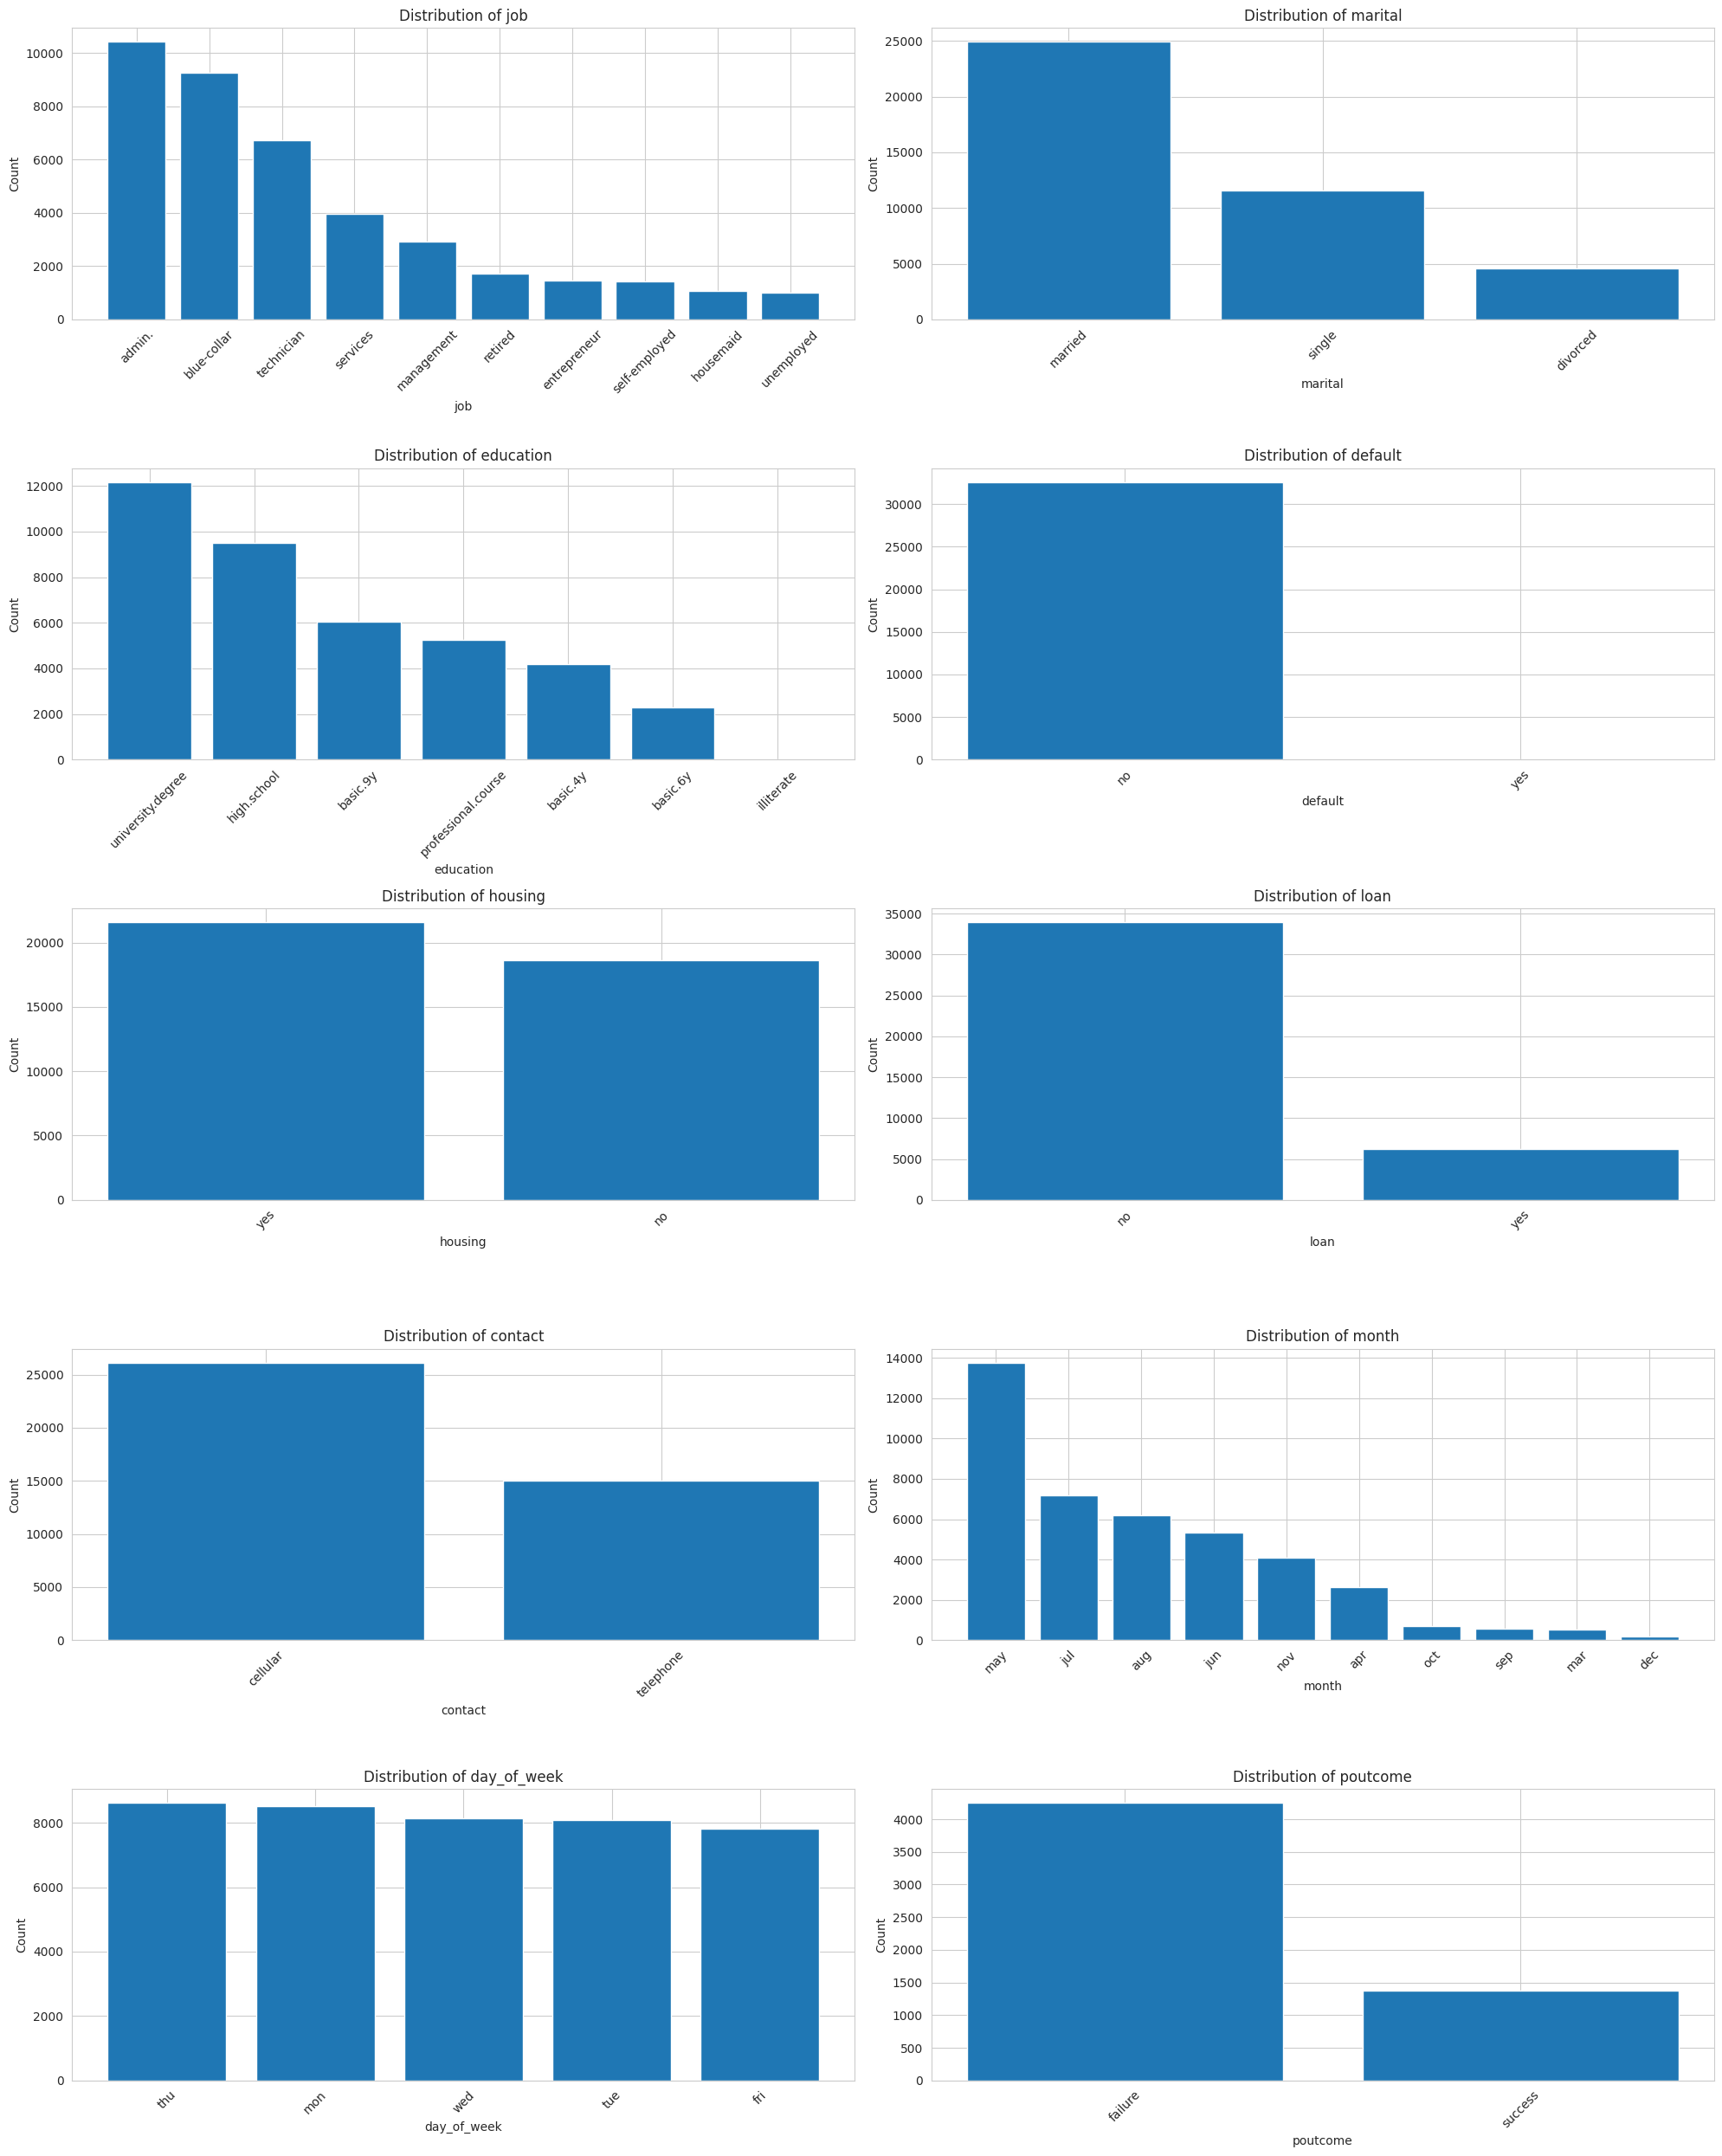

In [36]:
from google.colab import output
output.no_vertical_scroll()

# Categorical Variables
categorical_cols_for_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.ravel()

for i, col in enumerate(categorical_cols_for_plot):
    value_counts = df[col].value_counts().head(10)
    axes[i].bar(value_counts.index.astype(str), value_counts.values)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


Numerical Variables Distribution


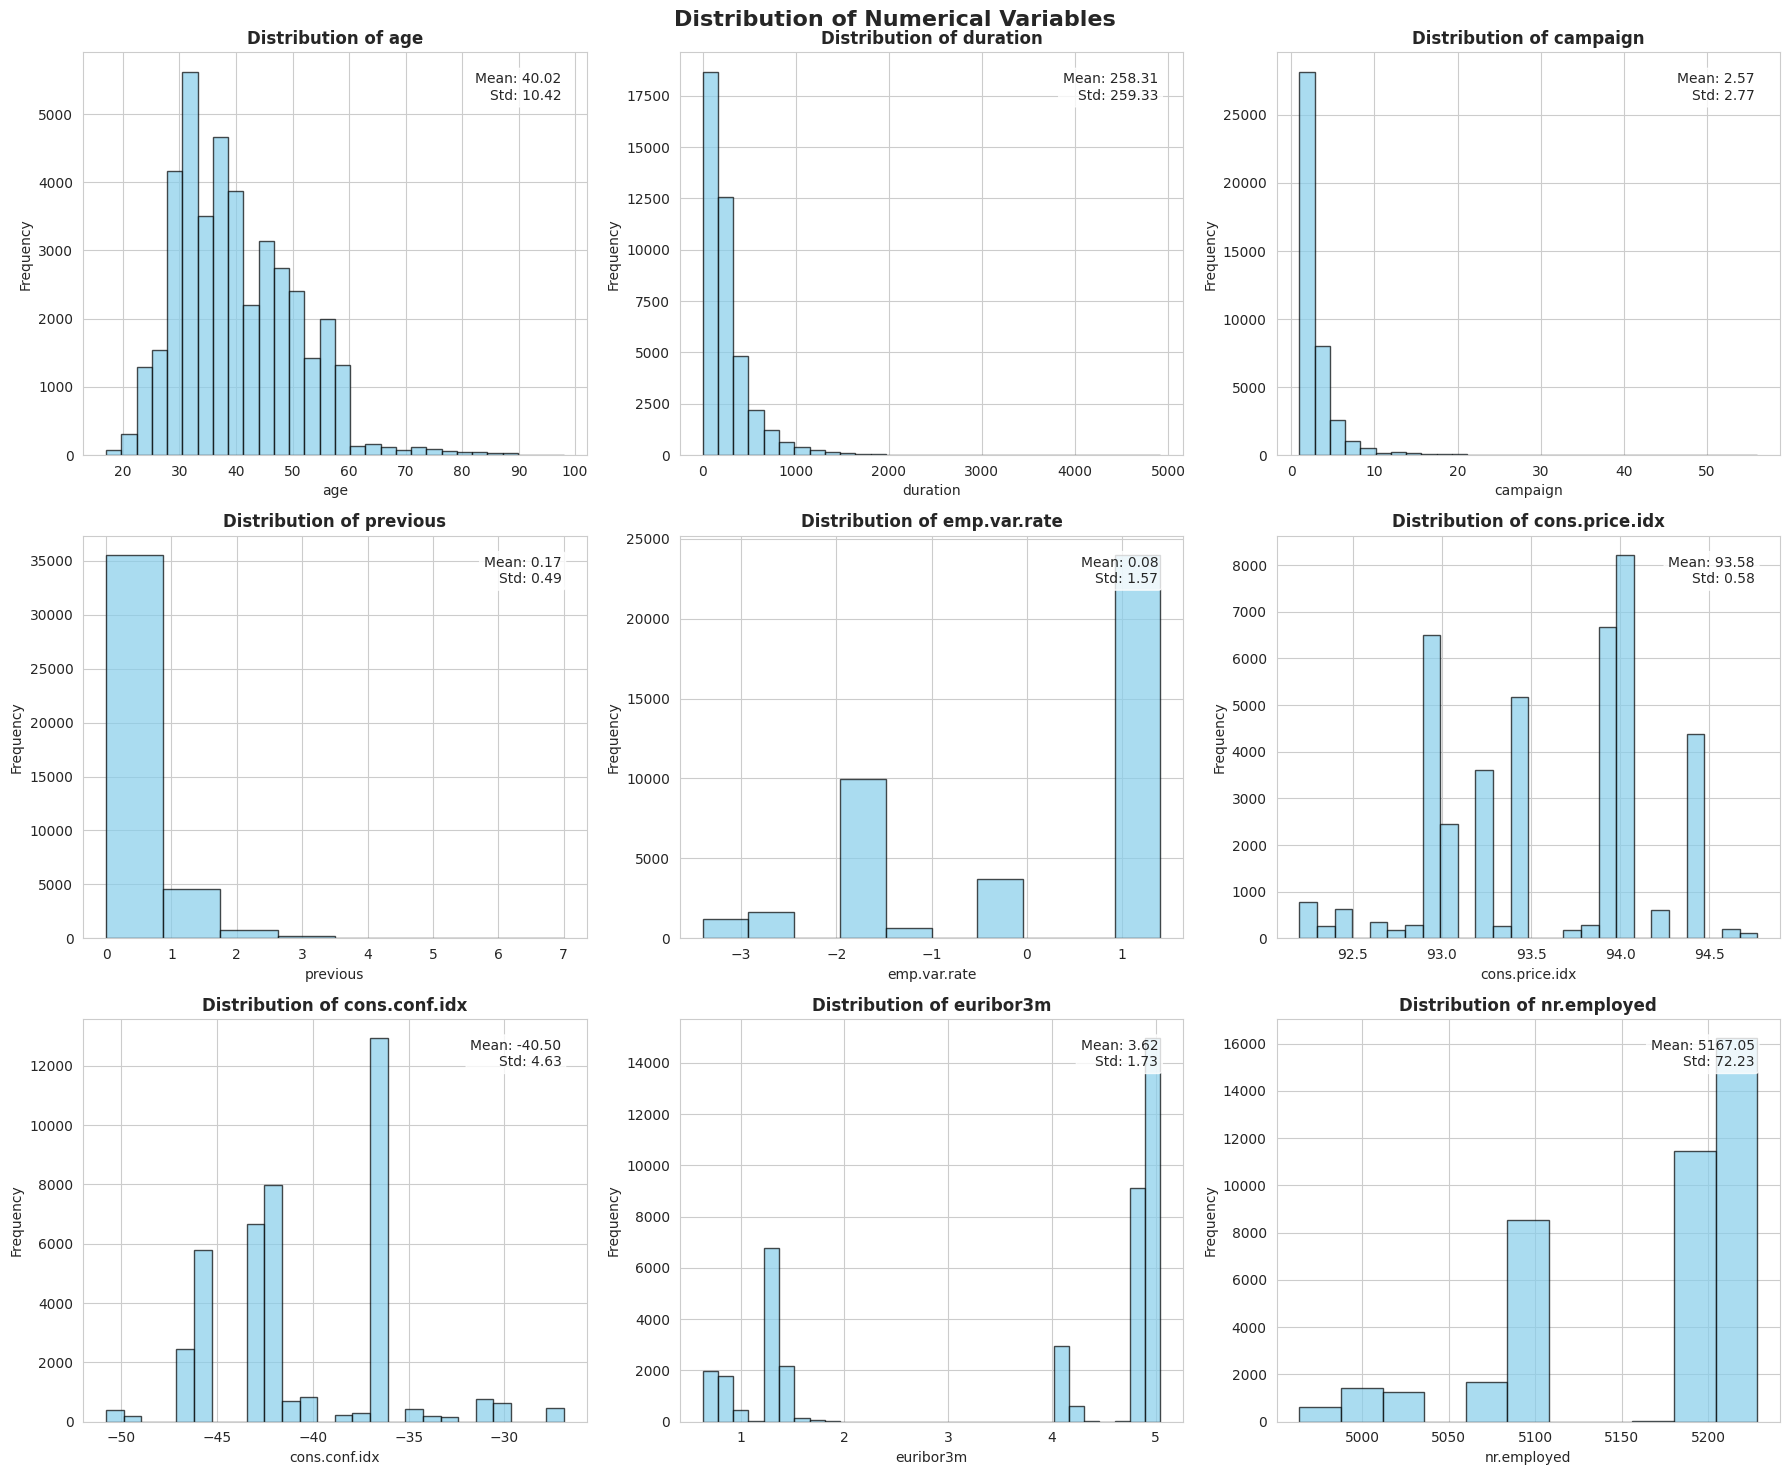

In [37]:
from google.colab import output
output.no_vertical_scroll()

print("\nNumerical Variables Distribution")
numerical_cols = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
                 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(numerical_cols):
        n_bins = min(30, len(df[col].dropna().unique()))
        axes[i].hist(df[col].dropna(), bins=n_bins, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

        # Add statistics as text
        stats_text = f'Mean: {df[col].mean():.2f}\nStd: {df[col].std():.2f}'
        axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes,
                    verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

for j in range(len(numerical_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


In [38]:
print(df['age'].describe())

count    41168.000000
mean        40.021449
std         10.419022
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64


In [39]:
print("\nCampaign Contacts Statistics:")
print(df['campaign'].describe())
print(f"\nClients contacted more than 5 times: {(df['campaign'] > 5).sum():,} ({(df['campaign'] > 5).mean()*100:.1f}%)")


Campaign Contacts Statistics:
count    41168.000000
mean         2.568087
std          2.770530
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

Clients contacted more than 5 times: 3,385 (8.2%)


In [40]:
print("\nCall Duration Statistics (seconds):")
print(df['duration'].describe())
print(f"\nCalls longer than 5 minutes (300s): {(df['duration'] > 300).sum():,} ({(df['duration'] > 300).mean()*100:.1f}%)")

print("\nEconomic Context Overview")
economic_vars = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
print("\nEconomic Indicators Summary:")
print(df[economic_vars].describe().round(3))

print("\nCorrelation between Economic Indicators:")
economic_corr = df[economic_vars].corr()
print(economic_corr.round(3))


Call Duration Statistics (seconds):
count    41168.000000
mean       258.311237
std        259.325938
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Calls longer than 5 minutes (300s): 11,200 (27.2%)

Economic Context Overview

Economic Indicators Summary:
       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
count     41168.000       41168.000      41168.000  41168.000    41168.000
mean          0.082          93.576        -40.502      3.621     5167.052
std           1.571           0.579          4.627      1.734       72.230
min          -3.400          92.201        -50.800      0.634     4963.600
25%          -1.800          93.075        -42.700      1.344     5099.100
50%           1.100          93.749        -41.800      4.857     5191.000
75%           1.400          93.994        -36.400      4.961     5228.100
max           1.400          94.767        -26.

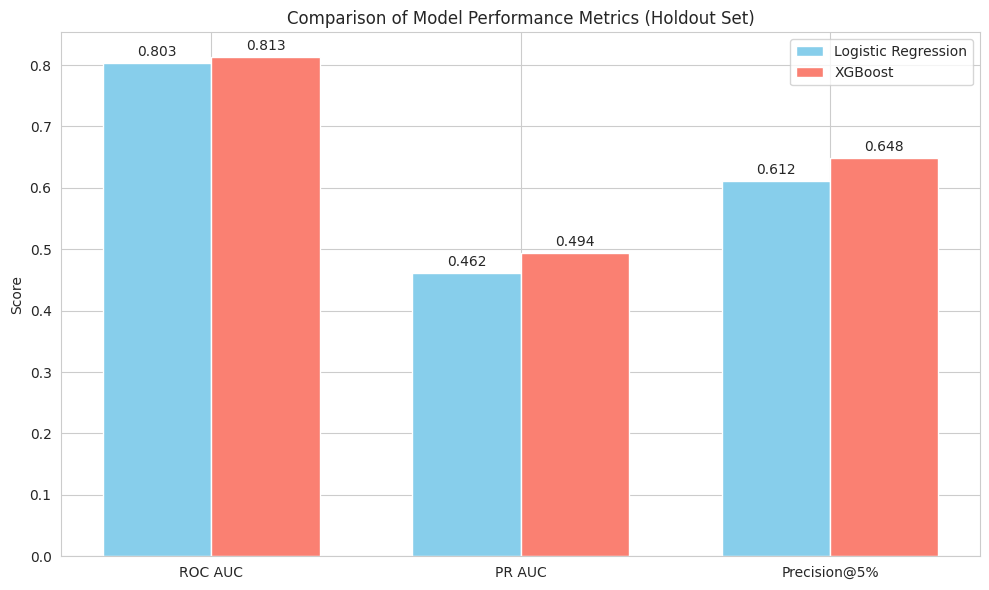

In [97]:
# Compare ROC AUC, PR AUC, and Precision@5% for both models
metrics = ['ROC AUC', 'PR AUC', 'Precision@5%']
log_scores = [roc_auc_score(y_test, log_probs), average_precision_score(y_test, log_probs), p_at_5_log]
xgb_scores = [roc_auc_score(y_test, xgb_probs), average_precision_score(y_test, xgb_probs), p_at_5_xgb]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, log_scores, width, label='Logistic Regression', color='skyblue')
rects2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='salmon')

# Add some text for labels, titles and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance Metrics (Holdout Set)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

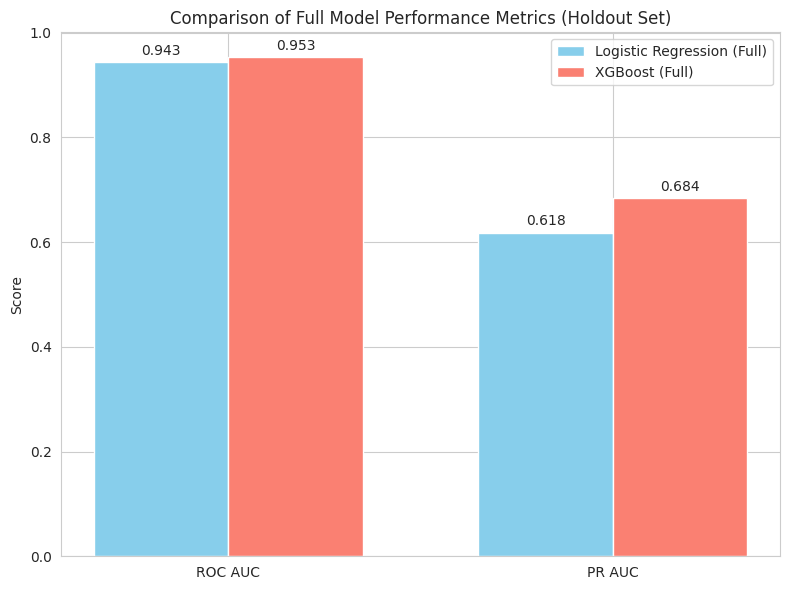

In [98]:
# Compare ROC AUC and PR AUC for the full models
metrics_full = ['ROC AUC', 'PR AUC']
log_scores_full = [log_auc_full, log_ap_full]
xgb_scores_full = [xgb_auc_full, xgb_ap_full]

x_full = np.arange(len(metrics_full))
width_full = 0.35

fig_full, ax_full = plt.subplots(figsize=(8, 6))
rects_log_full = ax_full.bar(x_full - width_full/2, log_scores_full, width_full, label='Logistic Regression (Full)', color='skyblue')
rects_xgb_full = ax_full.bar(x_full + width_full/2, xgb_scores_full, width_full, label='XGBoost (Full)', color='salmon')

# Add some text for labels, titles and custom x-axis tick labels, etc.
ax_full.set_ylabel('Score')
ax_full.set_title('Comparison of Full Model Performance Metrics (Holdout Set)')
ax_full.set_xticks(x_full)
ax_full.set_xticklabels(metrics_full)
ax_full.legend()

def autolabel_full(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax_full.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel_full(rects_log_full)
autolabel_full(rects_xgb_full)

fig_full.tight_layout()
plt.show()

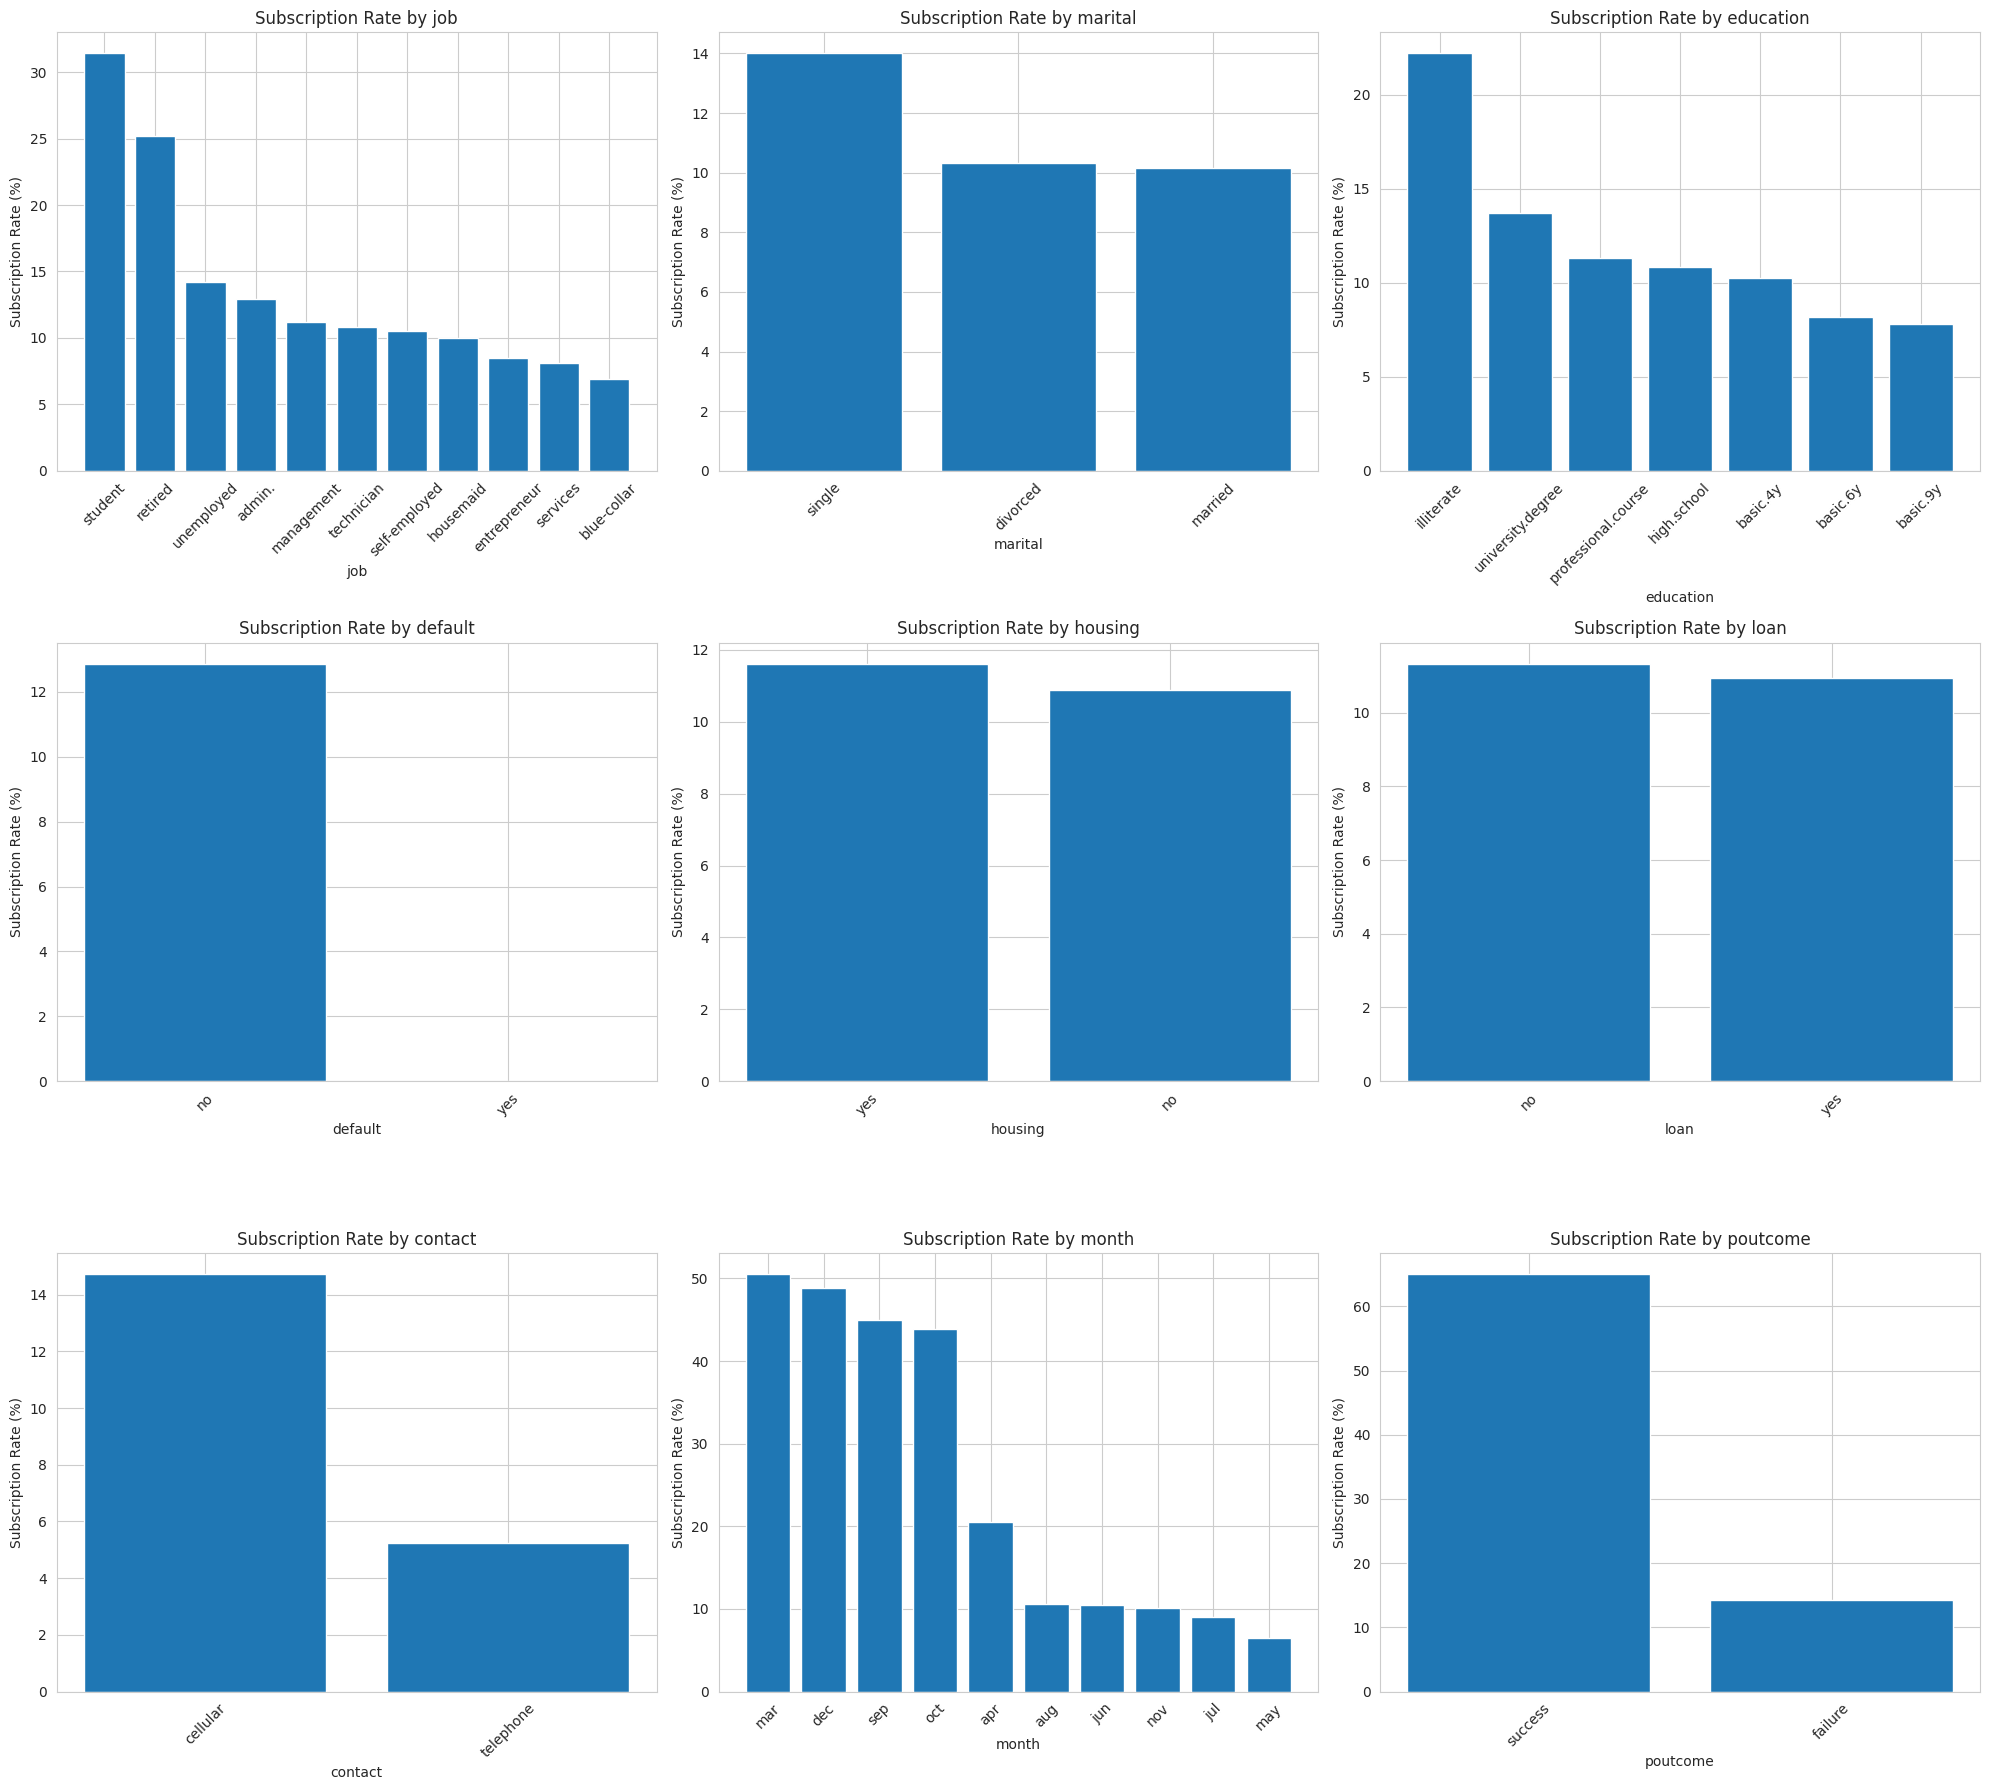

In [41]:
# Bivariate/Multivariate Analysis
# Categorical vs. Target: Subscription rate by category
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.ravel()
cat_vs_target_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for i, col in enumerate(cat_vs_target_cols):
    plot_df = df.groupby(col)['y'].apply(lambda x: (x == 'yes').mean() * 100).reset_index()
    plot_df = plot_df.sort_values(by='y', ascending=False)
    axes[i].bar(plot_df[col].astype(str), plot_df['y'])
    axes[i].set_title(f'Subscription Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Subscription Rate (%)')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

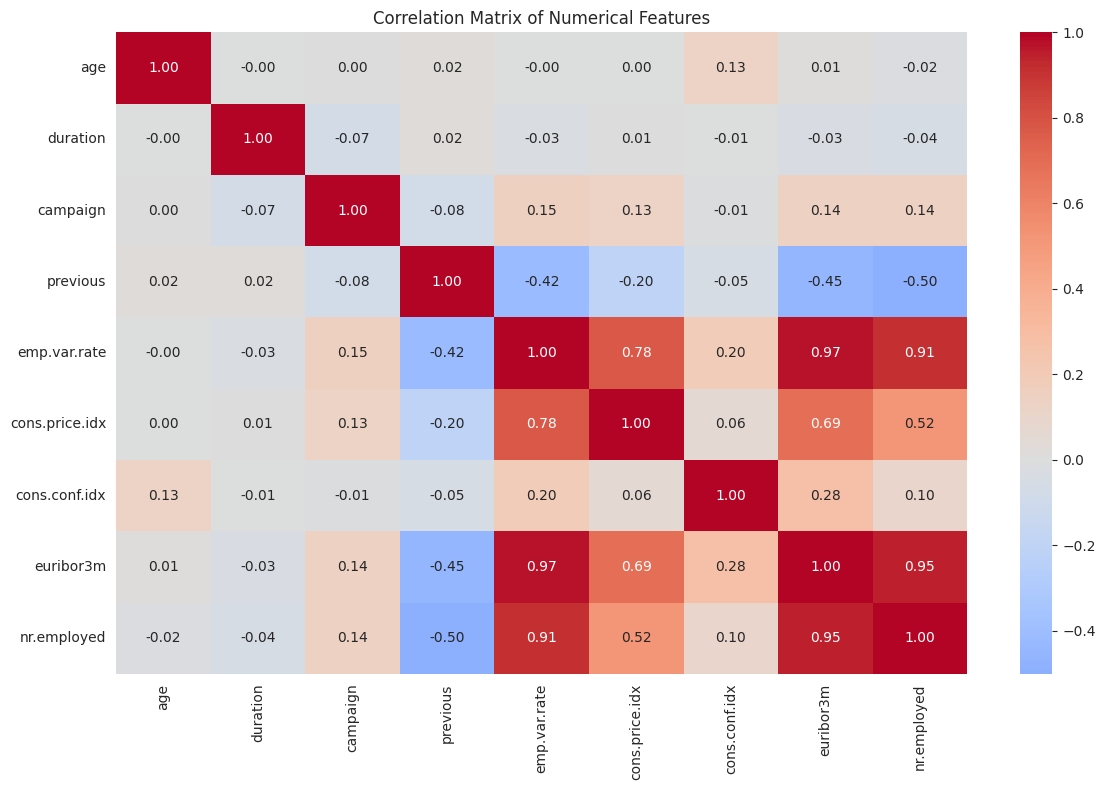

In [42]:
# Correlation Analysis for numerical features
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

Analysis of 'duration
'duration' is highly predictive but is only known AFTER the call.
It will likely be excluded from a predictive model for planning future campaigns.


In [43]:

# Analyze pdays (999 means not previously contacted)
print("\n--- Analysis of 'pdays' ---")
print("'pdays' has a value of 999 for", (df['pdays'] == 999).sum(), "clients (not contacted before).")
df['previously_contacted'] = np.where(df['pdays'].isna(), 'No', 'Yes')
prev_contact_rate = df.groupby('previously_contacted')['y'].apply(lambda x: (x=='yes').mean()*100)
print("\nSubscription Rate by Previous Contact:")
print(prev_contact_rate)



--- Analysis of 'pdays' ---
'pdays' has a value of 999 for 0 clients (not contacted before).

Subscription Rate by Previous Contact:
previously_contacted
No      9.259866
Yes    63.780568
Name: y, dtype: float64



--- Analysis of 'campaign' ---


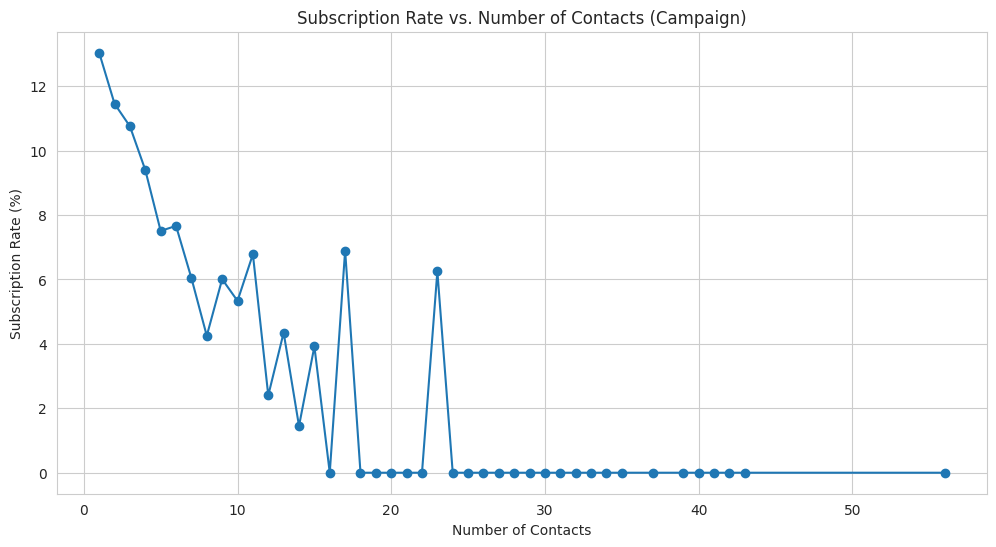

Generally, more contacts lead to lower success rates (client fatigue).


In [44]:

# Analyze campaign (number of contacts during this campaign)
print("\n--- Analysis of 'campaign' ---")
campaign_success = df.groupby('campaign')['y'].apply(lambda x: (x=='yes').mean()*100).reset_index()
plt.figure(figsize=(12, 6))
plt.plot(campaign_success['campaign'], campaign_success['y'], marker='o')
plt.title('Subscription Rate vs. Number of Contacts (Campaign)')
plt.xlabel('Number of Contacts')
plt.ylabel('Subscription Rate (%)')
plt.grid(True)
plt.show()
print("Generally, more contacts lead to lower success rates (client fatigue).")


In [45]:
# Analyze economic indicators
print("\n--- Analysis of Economic Indicators ---")
# Let's check the mean economic indicators for subscribed vs not subscribed
economic_indicators = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
print(df.groupby('y')[economic_indicators].mean())
print("\nNote: Strong correlation between euribor3m, emp.var.rate, and nr.employed.")


--- Analysis of Economic Indicators ---
     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
y                                                                       
no       0.248865       93.603691     -40.593132   3.811519  5176.175703
yes     -1.233146       93.353968     -39.786370   2.123831  5095.176795

Note: Strong correlation between euribor3m, emp.var.rate, and nr.employed.


<IPython.core.display.Javascript object>

/tmp/ipython-input-2617627580.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_success = df.groupby('duration_binned')['y'].apply(lambda x: (x == 'yes').mean() * 100)


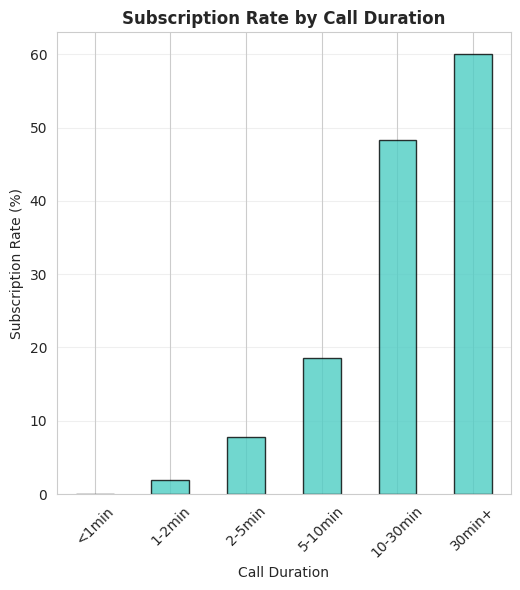

In [46]:
from google.colab import output
output.no_vertical_scroll()

# Duration distribution by subscription
plt.subplot(1, 2, 1)
duration_bins = [0, 60, 120, 300, 600, 1800, df['duration'].max()]
duration_labels = ['<1min', '1-2min', '2-5min', '5-10min', '10-30min', '30min+']
df['duration_binned'] = pd.cut(df['duration'], bins=duration_bins, labels=duration_labels, right=False)

duration_success = df.groupby('duration_binned')['y'].apply(lambda x: (x == 'yes').mean() * 100)
duration_success.plot(kind='bar', color='#4ECDC4', alpha=0.8, edgecolor='black')
plt.title('Subscription Rate by Call Duration', fontweight='bold')
plt.xlabel('Call Duration')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



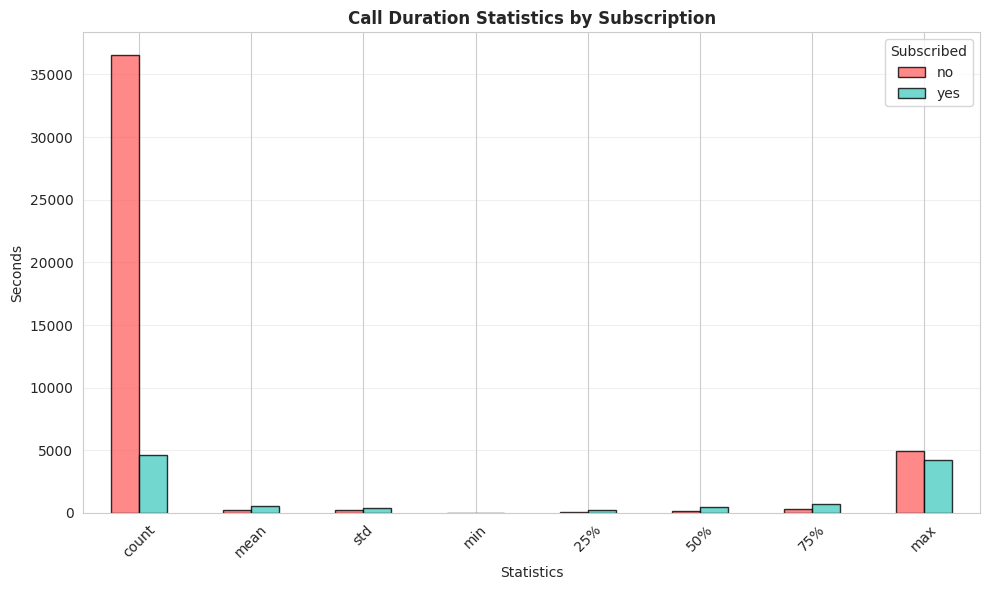

In [47]:
# Duration percentiles

duration_stats = df.groupby('y')['duration'].describe()
duration_stats.T.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], alpha=0.8, edgecolor='black')
plt.title('Call Duration Statistics by Subscription', fontweight='bold')
plt.xlabel('Statistics')
plt.ylabel('Seconds')
plt.xticks(rotation=45)
plt.legend(title='Subscribed')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [48]:
print(f"✓ Median duration for subscribers: {duration_stats.loc['yes', '50%']:.1f} seconds")
print(f"✓ Median duration for non-subscribers: {duration_stats.loc['no', '50%']:.1f} seconds")
print(f"✓ Subscription rate for calls >5min: {(df[df['duration'] > 300]['y'] == 'yes').mean()*100:.1f}%")


✓ Median duration for subscribers: 449.0 seconds
✓ Median duration for non-subscribers: 164.0 seconds
✓ Subscription rate for calls >5min: 27.9%


In [49]:
# Subscription rate by job
job_rate = df.groupby('job')['y'].apply(lambda x: (x=='yes').mean()).sort_values(ascending=False)
job_counts = df.groupby('job')['y'].count().sort_values(ascending=False)

print("Subscription rate by job:")
for job, rate in job_rate.items():
    count = job_counts[job]
    print(f"{job}: {rate:.2%} (Total clients: {count})")

Subscription rate by job:
student: 31.43% (Total clients: 875)
retired: 25.23% (Total clients: 1716)
unemployed: 14.20% (Total clients: 1014)
admin.: 12.97% (Total clients: 10419)
management: 11.22% (Total clients: 2923)
technician: 10.82% (Total clients: 6738)
self-employed: 10.49% (Total clients: 1421)
housemaid: 10.01% (Total clients: 1059)
entrepreneur: 8.52% (Total clients: 1456)
services: 8.15% (Total clients: 3965)
blue-collar: 6.90% (Total clients: 9252)


In [50]:
# Subscription rate by month

month_rate = df.groupby('month')['y'].apply(lambda x: (x=='yes').mean()).sort_values(ascending=False)
month_counts = df.groupby('month')['y'].count().sort_values(ascending=False)

print("Subscription rate by month:")
for month, rate in month_rate.items():
    count = month_counts[month]
    print(f"{month}: {rate:.2%} (Total clients: {count})")

Subscription rate by month:
mar: 50.55% (Total clients: 546)
dec: 48.90% (Total clients: 182)
sep: 44.91% (Total clients: 570)
oct: 43.93% (Total clients: 717)
apr: 20.49% (Total clients: 2631)
aug: 10.61% (Total clients: 6176)
jun: 10.51% (Total clients: 5318)
nov: 10.11% (Total clients: 4096)
jul: 9.04% (Total clients: 7169)
may: 6.44% (Total clients: 13763)


In [51]:
# Subscription rate by days of week
day_rate = df.groupby('day_of_week')['y'].apply(lambda x: (x=='yes').mean()).sort_values(ascending=False)
day_counts = df.groupby('day_of_week')['y'].count().sort_values(ascending=False)

print("Subscription rate by days of week:")
for day, rate in day_rate.items():
    count = day_counts[day]
    print(f"{day}: {rate:.2%} (Total clients: {count})")

Subscription rate by days of week:
thu: 12.10% (Total clients: 8617)
tue: 11.79% (Total clients: 8086)
wed: 11.67% (Total clients: 8133)
fri: 10.81% (Total clients: 7825)
mon: 9.94% (Total clients: 8507)


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

Xnum = df[['emp.var.rate','euribor3m','nr.employed']].dropna()
vif = pd.DataFrame()
vif["Variable"] = Xnum.columns
vif["VIF"] = [variance_inflation_factor(Xnum.values, i) for i in range(Xnum.shape[1])]
print(vif)


       Variable         VIF
0  emp.var.rate   18.531042
1     euribor3m  104.609717
2   nr.employed   82.202190


# **Modelling Seciton**
Note: All the sections starting from here are the part of Assignment 3. The same file used for assignment 1 is used in continuation for the final assignment.

In [53]:
df['pdays'] = df['pdays'].replace(999, np.nan)

In [54]:
df['y_bin'] = df['y'].map({'yes': 1, 'no': 0})

In [55]:
# Adding new helper features
df['long_call'] = (df['duration'] > 300).astype(int) # Flag long calls
df['campaign_bin'] = pd.cut(df['campaign'], bins=[-1,1,2,5,999],
                            labels=['1','2','3-5','6+'])  # Group campaigns
df['previously_contacted'] = np.where(df['pdays'].isna(), 'No', 'Yes')  # Contact history

In [56]:
# Choosing which columns to use
numeric_features = ['age','duration','previous','emp.var.rate','cons.price.idx',
                    'cons.conf.idx','euribor3m','nr.employed']
cat_features = ['job','marital','education','default','housing','loan',
                'contact','month','day_of_week','poutcome','campaign_bin','previously_contacted']

In [57]:
# Will be using 2 feature set, full model and pre-call
features_A = numeric_features + cat_features
features_B = [f for f in features_A if f not in ('duration','long_call')]

print("Shape:", df.shape)
print("Target distribution:")
print(df['y_bin'].value_counts(normalize=True).map(lambda x: f"{x*100:.2f}%"))
print("\nNumeric features:", numeric_features)
print("Categorical features:", cat_features)

Shape: (41168, 26)
Target distribution:
y_bin
0    88.74%
1    11.26%
Name: proportion, dtype: object

Numeric features: ['age', 'duration', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'campaign_bin', 'previously_contacted']


# **Model wihtout Call duration**

In [58]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline

In [59]:
# Spliting numeric and categorical preprocessing
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [60]:
preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_features),
    ('cat', cat_pipe, cat_features)
])

In [61]:
log_model = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000, random_state=42)

log_pipe = Pipeline([('prep', preprocessor), ('clf', log_model)])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['roc_auc', 'average_precision', 'f1']

In [62]:
# Defining a preprocessor for features excluding duration
numeric_features_B = [f for f in numeric_features if f != 'duration']
preprocessor_B = ColumnTransformer([
    ('num', num_pipe, numeric_features_B),
    ('cat', cat_pipe, cat_features)
])

# Creating pipelines with preprocessor
log_pipe_B = Pipeline([('prep', preprocessor_B), ('clf', log_model)])


cv_log = cross_validate(log_pipe_B, df[features_B], df['y_bin'], cv=cv, scoring=scoring, n_jobs=-1)
print("Logistic Regression:")
for k, v in cv_log.items():
    if k.startswith('test_'):
        print(f"{k}: {np.mean(v):.4f}")



Logistic Regression:
test_roc_auc: 0.7914
test_average_precision: 0.4477
test_f1: 0.4512


In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

# Creating the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(df['y_bin']==0).sum() / (df['y_bin']==1).sum(),
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

# Combining preprocessing + model
xgb_pipe = Pipeline([('prep', preprocessor_B), ('clf', xgb_model)])

# Run 5-fold CV with same metrics
cv_xgb = cross_validate(xgb_pipe, df[features_B], df['y_bin'], cv=cv,
                        scoring=scoring, n_jobs=-1)

print("\nXGBoost:")
for k, v in cv_xgb.items():
    if k.startswith('test_'):
        print(f"{k}: {np.mean(v):.4f}")


XGBoost:
test_roc_auc: 0.7966
test_average_precision: 0.4618
test_f1: 0.4728


In [64]:
from sklearn.model_selection import train_test_split

X = df[features_B].copy()
y = df['y_bin'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [65]:

print("Fitting Logistic Regression (pre-call)...")
log_pipe_B.fit(X_train, y_train)
print("Fitting XGBoost (pre-call)...")
xgb_pipe.fit(X_train, y_train)

Fitting Logistic Regression (pre-call)...
Fitting XGBoost (pre-call)...


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('encoder',...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [66]:
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Evaluating the model using ROC and  precision recall
def evaluate_model(name, model, X_t, y_t):
    probs = model.predict_proba(X_t)[:,1]
    preds = model.predict(X_t)
    roc = roc_auc_score(y_t, probs)
    pr = average_precision_score(y_t, probs)
    prec = precision_score(y_t, preds)
    rec = recall_score(y_t, preds)
    f1 = f1_score(y_t, preds)
    print(f"\n{name} -- ROC AUC: {roc:.4f} | PR AUC: {pr:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
    return probs, preds

In [67]:
log_probs, log_preds = evaluate_model("Logistic (pre-call)", log_pipe_B, X_test, y_test)
xgb_probs, xgb_preds = evaluate_model("XGBoost (pre-call)", xgb_pipe, X_test, y_test)


Logistic (pre-call) -- ROC AUC: 0.8030 | PR AUC: 0.4618 | Precision: 0.3664 | Recall: 0.6462 | F1: 0.4676

XGBoost (pre-call) -- ROC AUC: 0.8127 | PR AUC: 0.4943 | Precision: 0.3955 | Recall: 0.6570 | F1: 0.4937


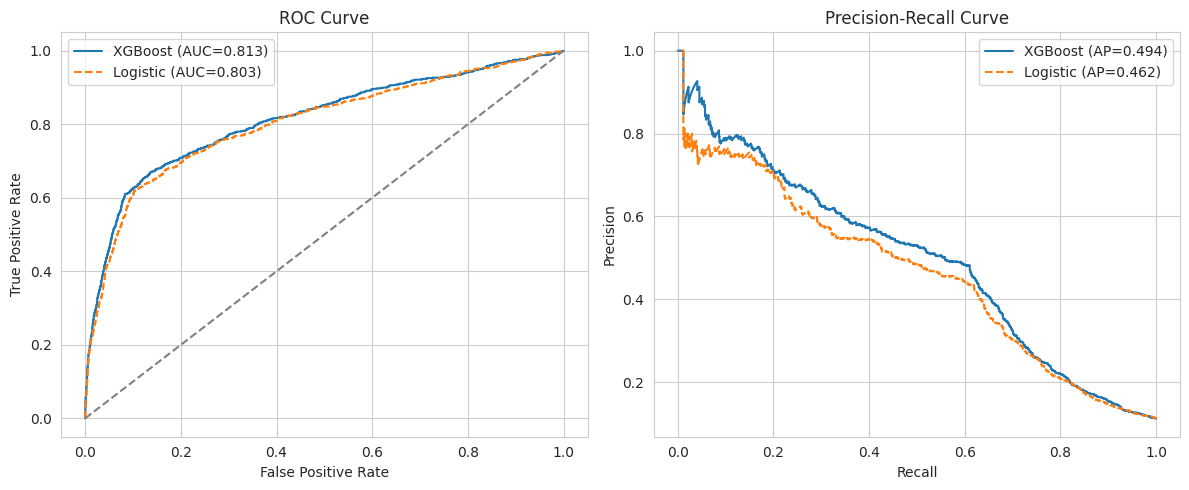

In [68]:
plt.figure(figsize=(12,5))

# the figures were in diferent blocks but keeping them together for the report
plt.subplot(1,2,1)
fpr, tpr, _ = roc_curve(y_test, xgb_probs)
plt.plot(fpr, tpr, label=f"XGBoost (AUC={roc_auc_score(y_test, xgb_probs):.3f})")
fpr2, tpr2, _ = roc_curve(y_test, log_probs)
plt.plot(fpr2, tpr2, label=f"Logistic (AUC={roc_auc_score(y_test, log_probs):.3f})", linestyle='--')
plt.plot([0,1],[0,1],'--', color='grey')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()


plt.subplot(1,2,2)
prec, rec, _ = precision_recall_curve(y_test, xgb_probs)
plt.plot(rec, prec, label=f"XGBoost (AP={average_precision_score(y_test, xgb_probs):.3f})")
prec2, rec2, _ = precision_recall_curve(y_test, log_probs)
plt.plot(rec2, prec2, label=f"Logistic (AP={average_precision_score(y_test, log_probs):.3f})", linestyle='--')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.tight_layout()
plt.show()


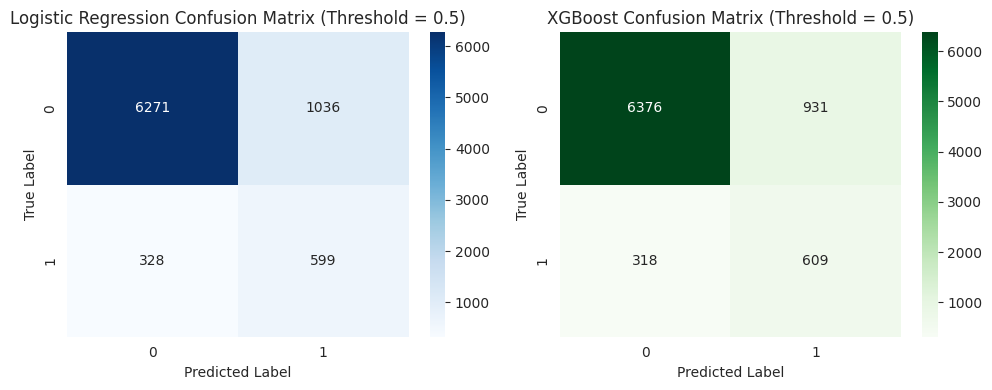

In [69]:
log_preds = (log_probs >= 0.5).astype(int)
xgb_preds = (xgb_probs >= 0.5).astype(int)

cm_log = confusion_matrix(y_test, log_preds)
cm_xgb = confusion_matrix(y_test, xgb_preds)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Logistic Regression heatmap
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix (Threshold = 0.5)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# XGBoost heatmap
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('XGBoost Confusion Matrix (Threshold = 0.5)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [70]:
def precision_at_k(probs, y_true, k=0.05):
    cutoff = np.percentile(probs, 100*(1-k))
    sel = probs >= cutoff
    if sel.sum() == 0:
        return np.nan, 0
    return (y_true[sel] == 1).mean(), sel.sum()

p_at_5_log, n_log = precision_at_k(log_probs, y_test, k=0.05)
p_at_5_xgb, n_xgb = precision_at_k(xgb_probs, y_test, k=0.05)
print(f"\nPrecision@5% -- Logistic: {p_at_5_log:.3f} (n={n_log}), XGBoost: {p_at_5_xgb:.3f} (n={n_xgb})")


Precision@5% -- Logistic: 0.612 (n=412), XGBoost: 0.648 (n=412)


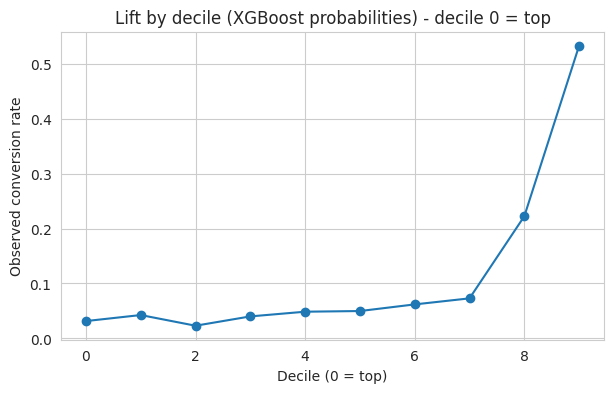

In [71]:
df_lift = pd.DataFrame({'y': y_test.values, 'prob': xgb_probs})
df_lift['decile'] = pd.qcut(df_lift['prob'], 10, labels=False, duplicates='drop')
lift = df_lift.groupby('decile')['y'].mean().sort_index(ascending=False)
plt.figure(figsize=(7,4))
lift.plot(marker='o')
plt.title('Lift by decile (XGBoost probabilities) - decile 0 = top')
plt.ylabel('Observed conversion rate')
plt.xlabel('Decile (0 = top)')
plt.show()

In [72]:
#saving plots ffor future references
pd.DataFrame({
    'y_true': y_test.values,
    'log_prob': log_probs,
    'xgb_prob': xgb_probs,
    'log_pred': log_preds,
    'xgb_pred': xgb_preds
}).to_csv('holdout_predictions.csv', index=False)

print("\nSaved holdout_predictions.csv with probs and preds.")


Saved holdout_predictions.csv with probs and preds.


# **Model Interpretation**

/tmp/ipython-input-1727799306.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='feature', x='odds_ratio', data=coef_df.head(15), palette='crest', legend=False)


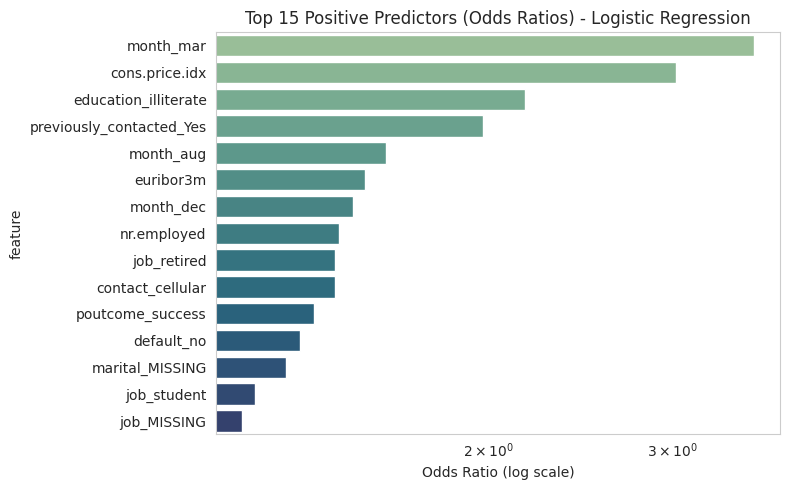

In [73]:
ohe = log_pipe_B.named_steps['prep'].transformers_[1][1].named_steps['encoder']
cat_input = log_pipe_B.named_steps['prep'].transformers_[1][2]
cat_names = list(ohe.get_feature_names_out(cat_input))
num_names = log_pipe_B.named_steps['prep'].transformers_[0][2]
feature_names = list(num_names) + cat_names

# Geting coefficients and odds ratios
coefs = log_pipe_B.named_steps['clf'].coef_.flatten()
odds = np.exp(coefs)
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coefs,
    'odds_ratio': odds
}).sort_values('odds_ratio', ascending=False)


plt.figure(figsize=(8,5))
sns.barplot(y='feature', x='odds_ratio', data=coef_df.head(15), palette='crest', legend=False)
plt.title('Top 15 Positive Predictors (Odds Ratios) - Logistic Regression')
plt.xlabel('Odds Ratio (log scale)')
plt.xscale('log')
plt.tight_layout()
plt.show()

In [74]:
preproc = xgb_pipe.named_steps['prep']
ohe2 = preproc.transformers_[1][1].named_steps['encoder']
cat_names2 = list(ohe2.get_feature_names_out(preproc.transformers_[1][2]))
num_names2 = preproc.transformers_[0][2]
all_features = num_names2 + cat_names2

# Geting feature importance values from XGBoost
xgb_model = xgb_pipe.named_steps['clf']
importance_vals = xgb_model.feature_importances_
feat_imp = pd.DataFrame({'feature': all_features, 'importance': importance_vals})
feat_imp = feat_imp.sort_values('importance', ascending=False)



/tmp/ipython-input-4264016341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='feature', x='importance', data=feat_imp.head(15), palette='viridis')


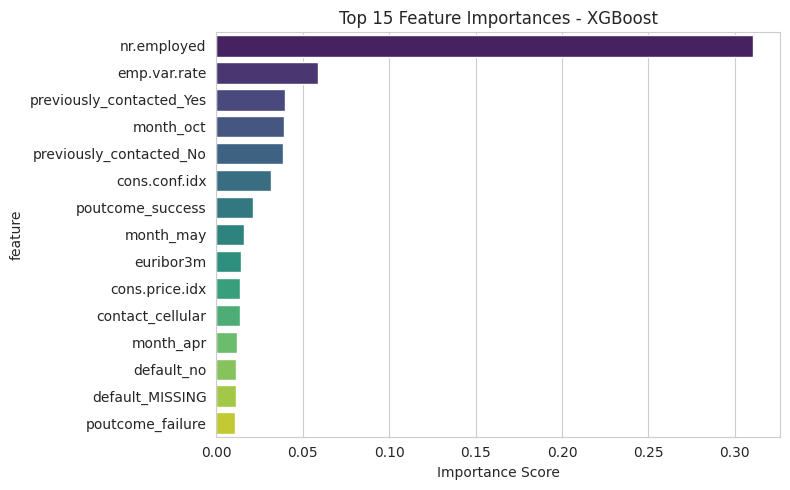

In [75]:

plt.figure(figsize=(8,5))
sns.barplot(y='feature', x='importance', data=feat_imp.head(15), palette='viridis')
plt.title('Top 15 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


# **Model including Call Duration**

In [76]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix

#including duration
preprocessor_A = ColumnTransformer([
    ('num', num_pipe, [c for c in numeric_features if c in df.columns]),   # includes 'duration'
    ('cat', cat_pipe, [c for c in cat_features if c in df.columns])
])

log_A = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000, random_state=42)
xgb_A = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    scale_pos_weight=(df['y_bin']==0).sum()/(df['y_bin']==1).sum(),
    random_state=42,
    n_jobs=1,
    eval_metric='logloss'
)

In [77]:
pipe_log_A = Pipeline([('prep', preprocessor_A), ('clf', log_A)])
pipe_xgb_A = Pipeline([('prep', preprocessor_A), ('clf', xgb_A)])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['roc_auc','average_precision','f1']

def cv_summary(pipe, X, y, name):
    res = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=1)
    print(f"\n{name} CV (mean ± std):")
    for k,v in res.items():
        if k.startswith('test_'):
            print(f" {k.replace('test_',''):16s}: {np.mean(v):.4f} ± {np.std(v):.4f}")
    return res

print("Running Full-model CV (this includes duration) ...")
res_log_A = cv_summary(pipe_log_A, df[features_A], df['y_bin'], "Logistic (Full)")
res_xgb_A = cv_summary(pipe_xgb_A, df[features_A], df['y_bin'], "XGBoost (Full)")

Xtr_A, Xte_A, ytr_A, yte_A = train_test_split(df[features_A], df['y_bin'], test_size=0.20, stratify=df['y_bin'], random_state=42)

pipe_log_A.fit(Xtr_A, ytr_A)
pipe_xgb_A.fit(Xtr_A, ytr_A)

Running Full-model CV (this includes duration) ...

Logistic (Full) CV (mean ± std):
 roc_auc         : 0.9375 ± 0.0021
 average_precision: 0.5898 ± 0.0118
 f1              : 0.5889 ± 0.0071

XGBoost (Full) CV (mean ± std):
 roc_auc         : 0.9490 ± 0.0020
 average_precision: 0.6665 ± 0.0140
 f1              : 0.6092 ± 0.0046


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=1,
                               num_parallel_tree=None, ...))])

In [78]:
from sklearn.metrics import roc_auc_score, average_precision_score
log_auc_full = roc_auc_score(yte_A, pipe_log_A.predict_proba(Xte_A)[:,1])
xgb_auc_full = roc_auc_score(yte_A, pipe_xgb_A.predict_proba(Xte_A)[:,1])
log_ap_full  = average_precision_score(yte_A, pipe_log_A.predict_proba(Xte_A)[:,1])
xgb_ap_full  = average_precision_score(yte_A, pipe_xgb_A.predict_proba(Xte_A)[:,1])

print(f"\nHoldout (Full) Logistic  -- ROC AUC: {log_auc_full:.4f}  | PR AUC: {log_ap_full:.4f}")
print(f"Holdout (Full) XGBoost   -- ROC AUC: {xgb_auc_full:.4f}  | PR AUC: {xgb_ap_full:.4f}")



Holdout (Full) Logistic  -- ROC AUC: 0.9434  | PR AUC: 0.6182
Holdout (Full) XGBoost   -- ROC AUC: 0.9529  | PR AUC: 0.6841


In [79]:
# Calibration plot and  optimal threshold that is based on F1
from sklearn.calibration import calibration_curve
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix

In [80]:
# Using holdout probabilities
try:
    y_t = y_test
    x_probs = xgb_probs
    l_probs = log_probs
except NameError:
    # missing values handing
    Xtr, Xte, ytr, yte = train_test_split(df[features_B], df['y_bin'], test_size=0.2,
                                          stratify=df['y_bin'], random_state=42)
    xgb_pipe.fit(Xtr, ytr)
    pipe_log_B.fit(Xtr, ytr)
    y_t = yte
    x_probs = xgb_pipe.predict_proba(Xte)[:, 1]
    l_probs = pipe_log_B.predict_proba(Xte)[:, 1]

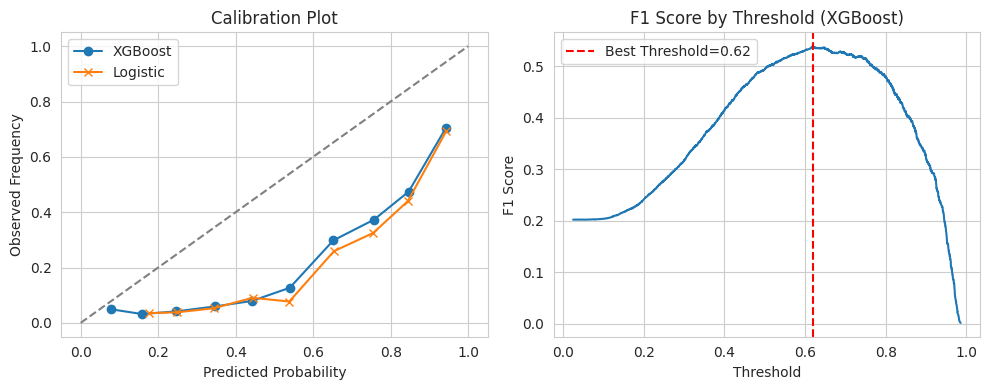

In [81]:
plt.figure(figsize=(10, 4))
# Calibration Curves
plt.subplot(1, 2, 1)
prob_true, prob_pred = calibration_curve(y_t, x_probs, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='XGBoost')
prob_true2, prob_pred2 = calibration_curve(y_t, l_probs, n_bins=10)
plt.plot(prob_pred2, prob_true2, marker='x', label='Logistic')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Frequency')
plt.title('Calibration Plot')
plt.legend()

#fingind best threshold for XGBoost
prec, rec, thr = precision_recall_curve(y_t, x_probs)
f1_scores = (2 * prec * rec) / (prec + rec + 1e-9)
best_idx = np.argmax(f1_scores)
best_thresh = thr[best_idx] if best_idx < len(thr) else 0.5
plt.subplot(1, 2, 2)
plt.plot(thr, f1_scores[:-1])
plt.axvline(best_thresh, color='red', linestyle='--', label=f"Best Threshold={best_thresh:.2f}")
plt.title('F1 Score by Threshold (XGBoost)')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.tight_layout()
plt.show()



Chosen threshold for XGBoost: 0.620
Classification report (XGBoost @ best threshold):
              precision    recall  f1-score   support

           0      0.949     0.917     0.933      7307
           1      0.482     0.611     0.539       927

    accuracy                          0.882      8234
   macro avg      0.715     0.764     0.736      8234
weighted avg      0.896     0.882     0.888      8234

Confusion matrix:
[[6699  608]
 [ 361  566]]


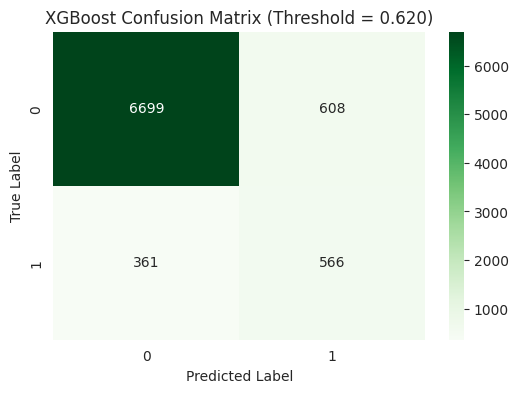

In [82]:
#Confusion Matrix at chosen threshold
x_pred_thresh = (x_probs >= best_thresh).astype(int)
print(f"\nChosen threshold for XGBoost: {best_thresh:.3f}")
print("Classification report (XGBoost @ best threshold):")
print(classification_report(y_t, x_pred_thresh, digits=3))
print("Confusion matrix:")
cm_xgb_thresh = confusion_matrix(y_t, x_pred_thresh)
print(cm_xgb_thresh)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb_thresh, annot=True, fmt='d', cmap='Greens')
plt.title(f'XGBoost Confusion Matrix (Threshold = {best_thresh:.3f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [83]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.base import clone

n_boot = 60
coef_samples = []

pre = log_pipe_B.named_steps['prep']
clf_template = log_pipe_B.named_steps['clf']

try:
    feat_names = list(pre.get_feature_names_out())
except Exception:
    num_names = list(pre.transformers_[0][2])
    ohe = pre.transformers_[1][1].named_steps['encoder']
    cat_cols = pre.transformers_[1][2]
    cat_names = list(ohe.get_feature_names_out(cat_cols))
    feat_names = num_names + cat_names

X_tr_trans = pre.fit_transform(X_train, y_train)  # numpy / sparse array
n_rows = X_tr_trans.shape[0]

i = 0
attempts = 0
max_attempts = n_boot * 10

In [84]:

while i < n_boot and attempts < max_attempts:
    attempts += 1

    idx = np.random.choice(np.arange(n_rows), size=n_rows, replace=True)
    yb = y_train.iloc[idx]

    if yb.nunique() < 2:
        continue
    Xb = X_tr_trans[idx]


    clf = clone(clf_template)
    try:
        clf.fit(Xb, yb)
    except Exception as e:

        print(f"Bootstrap fit failed at attempt {attempts}: {e}")
        continue

    coefs = clf.coef_.flatten()
    if coefs.shape[0] != X_tr_trans.shape[1]:
        print(f"Skipping sample because coef length {coefs.shape[0]} != n_features {X_tr_trans.shape[1]}")
        continue

    coef_samples.append(coefs)
    i += 1

if len(coef_samples) == 0:
    raise RuntimeError("No valid bootstrap samples collected. Try increasing data size or adjusting sampling.")


In [85]:

coef_samples = np.vstack(coef_samples)  # now a 2D array (n_boot x n_features)

coef_mean = coef_samples.mean(axis=0)
coef_lower = np.percentile(coef_samples, 2.5, axis=0)
coef_upper = np.percentile(coef_samples, 97.5, axis=0)

coef_df_boot = pd.DataFrame({
    'feature': feat_names,
    'coef_mean': coef_mean,
    'CI_lower': coef_lower,
    'CI_upper': coef_upper
})

coef_df_boot['odds_ratio'] = np.exp(coef_df_boot['coef_mean'])
coef_df_boot['odds_lower'] = np.exp(coef_df_boot['CI_lower'])
coef_df_boot['odds_upper'] = np.exp(coef_df_boot['CI_upper'])

coef_df_boot = coef_df_boot.reindex(coef_df_boot['coef_mean'].abs().sort_values(ascending=False).index)

print(coef_df_boot.head(15))




                          feature  coef_mean  CI_lower  CI_upper  odds_ratio  \
2               num__emp.var.rate  -2.256506 -2.711153 -1.897490    0.104716   
47                 cat__month_mar   1.256949  1.035180  1.451465    3.514682   
3             num__cons.price.idx   1.129826  0.866512  1.414439    3.095116   
46                 cat__month_jun  -0.794850 -1.055472 -0.628949    0.451649   
28      cat__education_illiterate   0.728041 -0.359022  1.616818    2.071020   
65  cat__previously_contacted_Yes   0.684914  0.429622  0.926482    1.983602   
48                 cat__month_may  -0.636774 -0.762972 -0.537105    0.528996   
64   cat__previously_contacted_No  -0.615786 -0.828451 -0.397145    0.540216   
49                 cat__month_nov  -0.524664 -0.654481 -0.387974    0.591754   
43                 cat__month_aug   0.454397  0.254705  0.616471    1.575223   
44                 cat__month_dec   0.439795  0.017481  0.754446    1.552389   
6                num__nr.employed   0.41

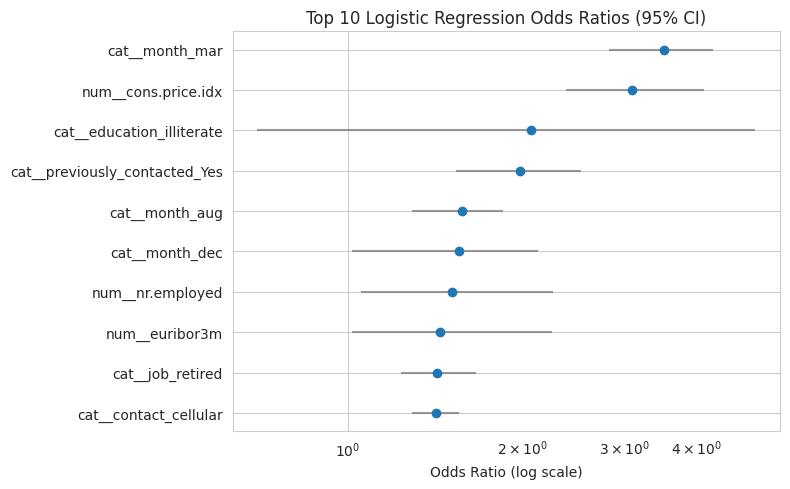

In [86]:
import matplotlib.pyplot as plt
import numpy as np

dfb = coef_df_boot.copy()
dfb = dfb.sort_values('odds_ratio', ascending=False).head(10)
y = np.arange(len(dfb))
odds = dfb['odds_ratio'].values
lo = dfb['odds_lower'].values
hi = dfb['odds_upper'].values
labels = dfb['feature'].values

plt.figure(figsize=(8,5))
plt.hlines(y, lo, hi, color='gray', alpha=0.8)
plt.plot(odds, y, 'o', color='C0')
plt.yticks(y, labels)
plt.xscale('log')
plt.xlabel('Odds Ratio (log scale)')
plt.title('Top 10 Logistic Regression Odds Ratios (95% CI)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

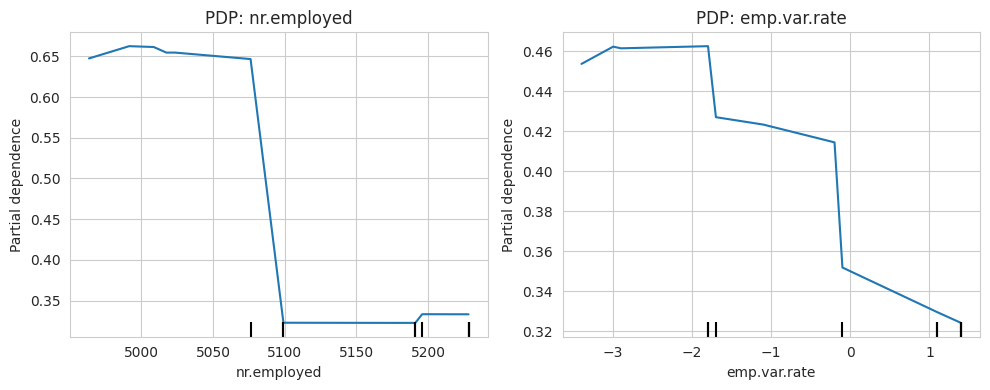

In [87]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

top_feats = ['nr.employed', 'emp.var.rate']

fig, ax = plt.subplots(1, len(top_feats), figsize=(5*len(top_feats), 4))
for i, f in enumerate(top_feats):
    PartialDependenceDisplay.from_estimator(xgb_pipe, X_test, [f], ax=ax[i])
    ax[i].set_title(f'PDP: {f}')
plt.tight_layout()
plt.show()


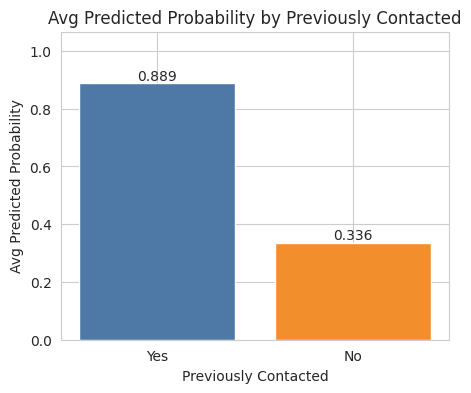

  previously_contacted      mean  count
1                  Yes  0.888650    286
0                   No  0.336149   7948


In [88]:
# checking previously contacted predicted probability
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X_eval = X_test.copy() if 'X_test' in globals() else df[features_B].sample(n=2000, random_state=42)

X_eval['previously_contacted'] = X_eval['previously_contacted'].astype(str)

probs = xgb_pipe.predict_proba(X_eval)[:, 1]

grp = pd.DataFrame({'previously_contacted': X_eval['previously_contacted'], 'prob': probs})
summary = grp.groupby('previously_contacted')['prob'].agg(['mean','count']).reset_index().sort_values('mean', ascending=False)

# Plot bar chart
plt.figure(figsize=(5,4))
plt.bar(summary['previously_contacted'], summary['mean'], color=['#4E79A7', '#F28E2B'])
for i, v in enumerate(summary['mean']):
    plt.text(i, v+0.01, f"{v:.3f}", ha='center')
plt.title('Avg Predicted Probability by Previously Contacted')
plt.xlabel('Previously Contacted')
plt.ylabel('Avg Predicted Probability')
plt.ylim(0, summary['mean'].max()*1.2)
plt.show()

print(summary)


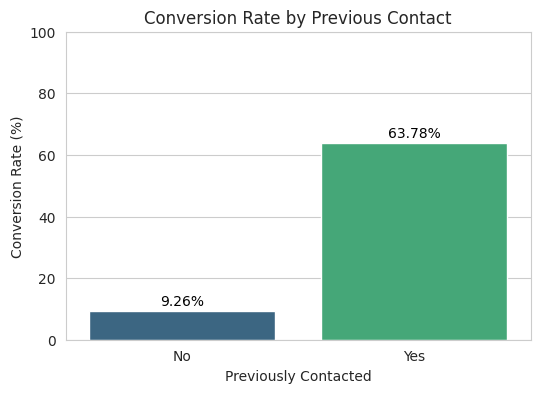

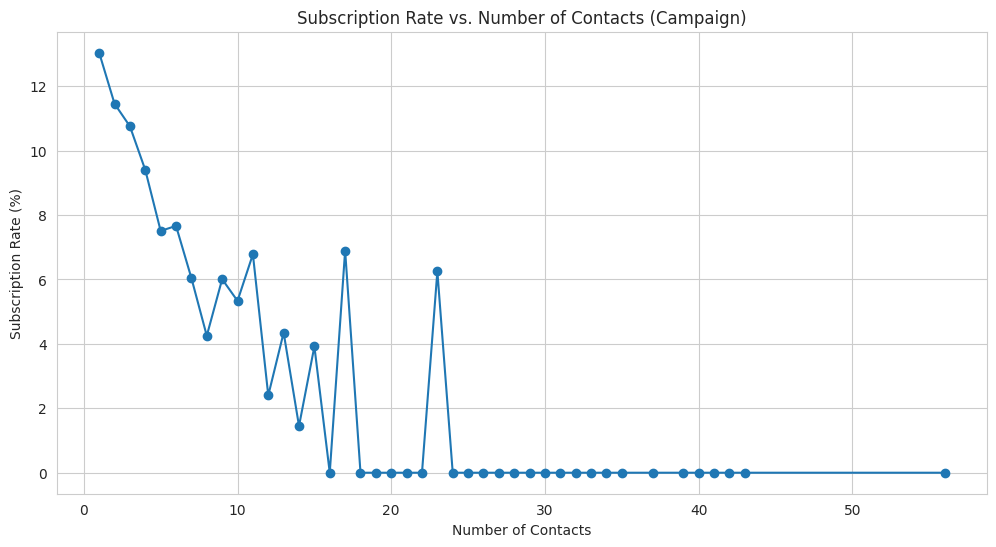

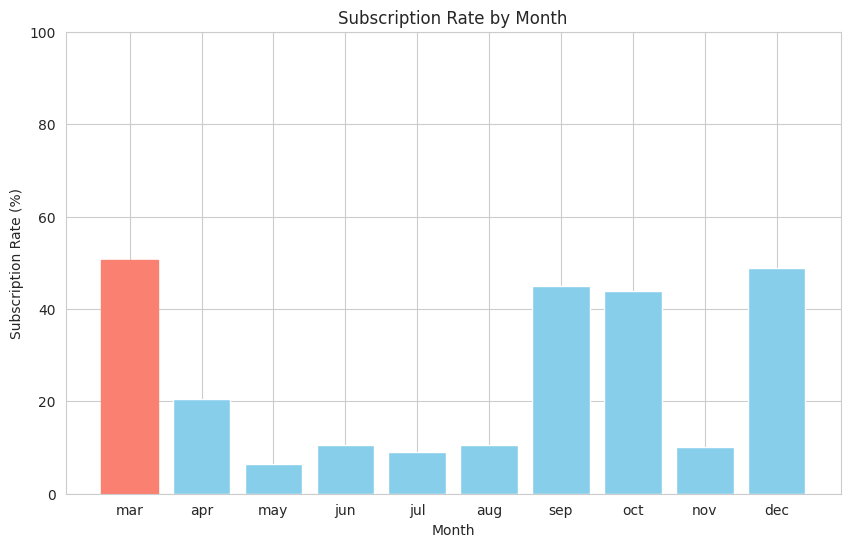

In [100]:
# Bar chart: Conversion rate by previously_contacted (Yes/No).
prev_contact_rate = df.groupby('previously_contacted')['y'].apply(lambda x: (x=='yes').mean()*100).reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='previously_contacted', y='y', data=prev_contact_rate, palette='viridis', hue='previously_contacted')
plt.title('Conversion Rate by Previous Contact')
plt.xlabel('Previously Contacted')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, 100)
for index, row in prev_contact_rate.iterrows():
    plt.text(index, row['y'] + 2, f"{row['y']:.2f}%", color='black', ha="center")
plt.show()


# Line graph: Subscription rate vs. number of contacts (sharp drop after 5).
campaign_success = df.groupby('campaign')['y'].apply(lambda x: (x=='yes').mean()*100).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(campaign_success['campaign'], campaign_success['y'], marker='o')
plt.title('Subscription Rate vs. Number of Contacts (Campaign)')
plt.xlabel('Number of Contacts')
plt.ylabel('Subscription Rate (%)')
plt.grid(True)
plt.show()


# Column chart: Campaign success by month (highlight March).
month_rate = df.groupby('month')['y'].apply(lambda x: (x=='yes').mean()*100).reindex(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']).reset_index()
month_rate = month_rate.rename(columns={'y': 'Subscription Rate (%)'})

plt.figure(figsize=(10, 6))
bars = plt.bar(month_rate['month'], month_rate['Subscription Rate (%)'], color='skyblue')
bars[month_rate[month_rate['month'] == 'mar'].index[0]].set_color('salmon') # Highlight March
plt.title('Subscription Rate by Month')
plt.xlabel('Month')
plt.ylabel('Subscription Rate (%)')
plt.ylim(0, 100)
plt.show()